In [59]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import time

$x \in (0,1)$. The Cauchy problem is:
$$\frac{\partial y}{\partial x}=\alpha (x) x+y$$
$$y(0)=1$$
The objective function to minimize is:
$$J(y,\alpha)=\int_{0}^{1} |y-(x+1)e^{x}|^2 dx$$
$\alpha(x)$ is the spatial function to determine.

$y$ is called solution, $f(x) = (x+1)e^{x}$ is called observation.

In [60]:
n = 100 ##number of intervals
alpha = np.ones(n) ##initial values
step = 0.01 ##step size for optimization

The discretized equation can be written into a linear system:
$$AY = B(\alpha*X)+C,$$
where $A$ and $B$ are $n\times n$ matrices, $Y$ is the soloution vector, $X$ is the discretized definition domain, $C$ is a constant vector. * is the Hadamard product. 

$$
A = 
\left[{\begin{array}{cc}
1 & 0 & ...& 0\\
-(n+1) & n & ...& 0\\
0 & (-n+1) & n & ...\\
. & . & ...& .\\
0 & ... & -(n+1) & n\\
\end{array}}\right],
\qquad
B = 
\left[{\begin{array}{cc}
0 & 0 & ...& 0\\
1 & 0 & ...& 0\\
0 & 1 & ...& 0\\
. & . & ...& .\\
0 & ... & 1 & 0\\
\end{array}}\right],
\quad
C = 
\left[{\begin{array}{cc}
1\\
0\\
0\\
.\\
0 \\
\end{array}}\right],
\quad$$

In [61]:
#write the values of A, B, C as well as x
B = np.zeros((n, n))
for i in range(1, n):
    B[i, i-1] = 1.0
    
A = -(n+1) * B + n * np.identity(n)
A[0,0] = 1.0

C = np.zeros(n)
C[0] = 1.0

x = np.asarray(range(n))/n

In [62]:
def pde_solver(alpha):
        
    return np.linalg.solve(A, np.dot(B, alpha*x)+C)

In [63]:
def J(Y, F):
    h = (Y-F)**2
    
    return np.sum(h / n)

In [64]:
def J_grad_Y(Y):
    
    return 2 * (Y - F) / n

In [65]:
def J_grad_alpha(Y, alpha):
    p = np.linalg.solve(A.T, J_grad_Y(Y))
    
    return np.dot(np.dot(B, np.diag(x)).T, p)

In [66]:
F = (x + 1)*np.exp(x)
    
Y0 = Y = pde_solver(alpha)

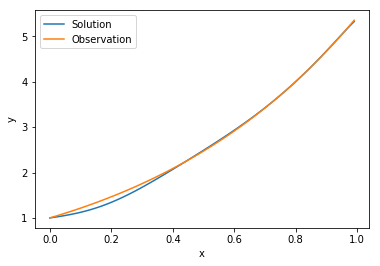

In [82]:
plt.subplot(1, 1, 1)
plt.plot(x, Y, x, F)
plt.xlabel('x')
plt.ylabel('y')

plt.gca().legend(('Solution','Observation'))

In [68]:
iteration = 0
Err= J(Y, F)
loss = list()
Y_list = list()
Y_list.append(Y)
start_time = time.time()

for k in range(10000000):
    loss.append(Err)
    iteration += 1
    alpha1 = alpha - step * J_grad_alpha(Y, alpha)
    Y = pde_solver(alpha1)
    Y_list.append(Y)

    err = J(Y, F)
    alpha = alpha1
    if (abs(err-Err)/Err < 1e-7):
        break
    Err = err

run_time = time.time() - start_time
loss.append(Err)

KeyboardInterrupt: 

In [69]:
print('alpha=', alpha)
print('iteration=', iteration)
print('err', err)
print('run time', run_time)

alpha= [1.         1.53976332 2.06600992 2.57681396 3.07029665 3.54464941
 3.9981553  4.42920892 4.83633441 5.21820146 5.57363932 5.90164854
 6.20141062 6.47229525 6.71386533 6.92587972 7.1082937  7.26125722
 7.3851111  7.48038113 7.54777036 7.58814956 7.60254615 7.5921317
 7.55820819 7.50219322 7.42560447 7.33004342 7.21717878 7.08872965
 6.9464487  6.79210552 6.62747045 6.45429884 6.27431621 6.08920411
 5.90058715 5.71002106 5.51898202 5.32885729 5.14093717 4.95640843
 4.77634905 4.60172451 4.43338533 4.2720661  4.11838576 3.97284914
 3.83584962 3.70767299 3.58850213 3.47842265 3.37742929 3.28543291
 3.20226803 3.12770077 3.06143702 3.00313086 2.95239291 2.90879875
 2.87189706 2.84121758 2.81627869 2.79659454 2.78168173 2.77106533
 2.76428437 2.76089647 2.76048188 2.76264654 2.76702435 2.77327842
 2.78110127 2.79021392 2.80036362 2.8113202  2.82287071 2.8348122
 2.84694222 2.85904669 2.87088462 2.88216893 2.89254279 2.90155026
 2.90860007 2.91292105 2.91350739 2.90905125 2.89786009 2

Text(0, 0.5, 'J')

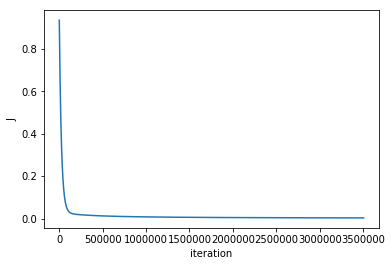

In [81]:
plt.plot(loss)
#plt.title('the value of J')
plt.xlabel('iteration')
plt.ylabel('J')

In [74]:
Y_list = np.asarray(Y_list)

In [ ]:
def init():  
    line.set_data(list(x), list(Y_list[0,:]))  
    return line,

def animate(i):
    y = Y_list[i,:]
    line.set_data(list(x), list(y))
    return line,

In [ ]:
fig = plt.figure(figsize=(4,4))

ax = fig.add_axes([0,0,1,1])
ax.set_xlim([0, 1])
ax.set_ylim([0, 7])
line, = ax.plot([], [], lw=2)

def init():  
    line.set_data(list(x), list(Y_list[0,:]))  
    return line,

def animate(i):
    y = Y_list[i,:]
    line.set_data(list(x), list(y))
    return line,

anim1 = FuncAnimation(fig, animate, init_func=init, interval=200, frames = len(Y_list)+1, blit=False)
plt.show()

In [75]:
Y_list.shape

(3506414, 100)

In [ ]:
for i in 3506414